<h3>1. Import libraries needed to run the code</h3>

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

<h3>2. Define start & end day to fetch dataset from Yahoo finance library</h3>

In [2]:
# Specify the start and end date
years = 10
end_date = datetime.now()
starting_year = end_date.year - years
start_date = datetime(starting_year, end_date.month, end_date.day)
# Specify the stock code (can be found on Yahoo Finance), for training we are using BTC-USD
stock = "BTC-USD"
# Download the training stock data
df = yf.download(stock, start_date, end_date)
# Display the first 5 rows
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


<h3>3. Data exploration</h3>

In [3]:
# Display the statistically description of the data in the DataFrame
"""
If the DataFrame contains numerical data, the description contains these information for each column:

count - The number of not-empty values.
mean - The average (mean) value.
std - The standard deviation.
min - the minimum value.
25% - The 25% percentile*.
50% - The 50% percentile*.
75% - The 75% percentile*.
max - the maximum value.

*Percentile meaning: how many of the values are less than the given percentile.
"""
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,3613.000000,3613.000000,3613.000000,3613.000000,3613.000000,3.613000e+03
mean,17337.126634,17731.423043,16913.512316,17351.860741,17351.860741,1.748474e+10
std,19224.167438,19654.744457,18745.850481,19231.963511,19231.963511,1.922184e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,1102.949951,1125.390015,1075.449951,1115.300049,1115.300049,2.705240e+08
50%,8941.445312,9203.320312,8793.163086,8988.596680,8988.596680,1.364720e+10
75%,28373.513672,28889.009766,27883.386719,28411.035156,28411.035156,2.818627e+10
max,73079.375000,73750.070312,71334.093750,73083.500000,73083.500000,3.509679e+11


In [4]:
# Display the information about the data in the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3613 entries, 2014-09-17 to 2024-08-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3613 non-null   float64
 1   High       3613 non-null   float64
 2   Low        3613 non-null   float64
 3   Close      3613 non-null   float64
 4   Adj Close  3613 non-null   float64
 5   Volume     3613 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 197.6 KB


In [5]:
# Check for missing values
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
# Choose the closing price as the target variable
Closing_price = df[['Close']]
Closing_price

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2024-08-03,60680.093750
2024-08-04,58116.976562
2024-08-05,53991.457031


<h3>Visualizing close price of Bit Coin</h3>

Text(0.5, 1.0, 'Close price of Bit Coin')

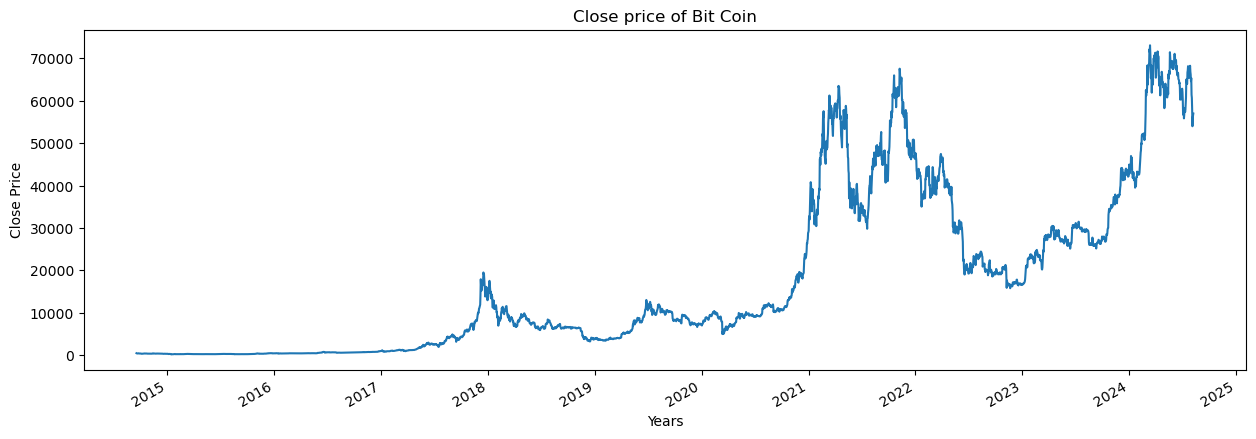

In [7]:
plt.figure(figsize=(15,5))
Closing_price['Close'].plot()
plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Close price of Bit Coin')

Plotting moving averages of 365-day

In [8]:
Closing_price['MA_for_365_days'] = Closing_price['Close'].rolling(365).mean()
Closing_price['MA_for_365_days'].head()

C:\Users\asus\AppData\Local\Temp\ipykernel_2632\686540890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Closing_price['MA_for_365_days'] = Closing_price['Close'].rolling(365).mean()


Date
2014-09-17   NaN
2014-09-18   NaN
2014-09-19   NaN
2014-09-20   NaN
2014-09-21   NaN
Name: MA_for_365_days, dtype: float64

In [9]:
Closing_price['MA_for_365_days'][0:365].tail()

Date
2015-09-12           NaN
2015-09-13           NaN
2015-09-14           NaN
2015-09-15           NaN
2015-09-16    281.916161
Name: MA_for_365_days, dtype: float64

Text(0.5, 1.0, 'Close price of Bit Coin')

<Figure size 640x480 with 0 Axes>

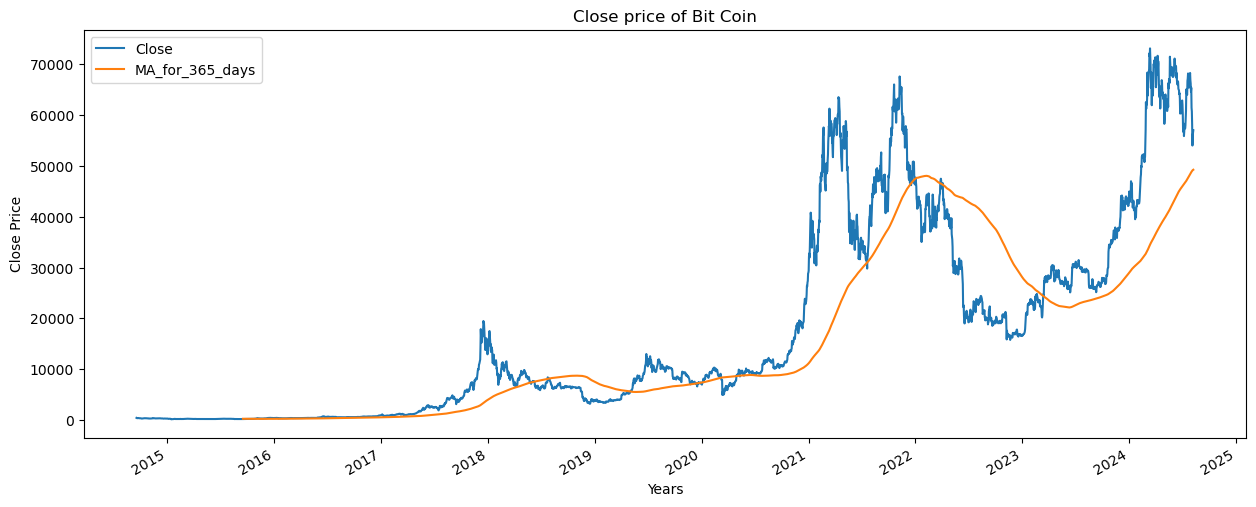

In [10]:
plt.figure()
Closing_price[['Close','MA_for_365_days']].plot(figsize=(15,6))
plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Close price of Bit Coin')

<p>Plotting moving averages of 365-day does not look like the actual pattern, modify to 100-day for more accurate result</p>
<h3>Plotting moving averages of 100-day</h3>

C:\Users\asus\AppData\Local\Temp\ipykernel_2632\1013624105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Closing_price['MA_for_100_days'] = Closing_price['Close'].rolling(100).mean()


Text(0.5, 1.0, 'Close price of Bit Coin')

<Figure size 640x480 with 0 Axes>

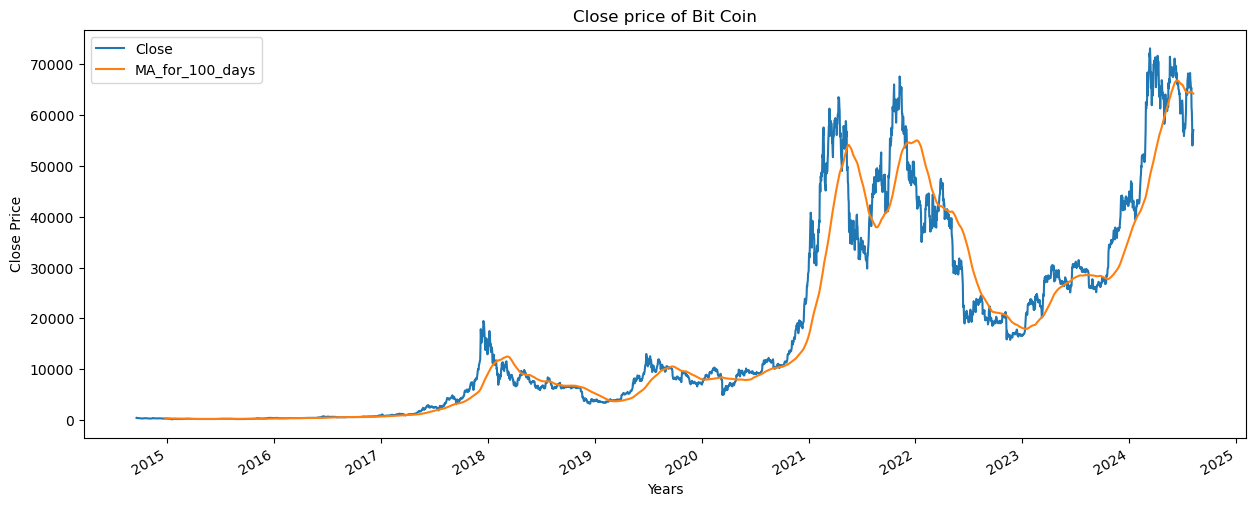

In [11]:
Closing_price['MA_for_100_days'] = Closing_price['Close'].rolling(100).mean()
Closing_price['MA_for_100_days'].head()
plt.figure()
Closing_price[['Close','MA_for_100_days']].plot(figsize=(15,6))
plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Close price of Bit Coin')

<h3>4. Data preprocessing</h3>

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object (range 0 to 1)
scaler = MinMaxScaler(feature_range=(0,1))
# Fit and transform the data
scaled_data = scaler.fit_transform(Closing_price[['Close']].values)
scaled_data

array([[0.00383005],
       [0.00337886],
       [0.00297225],
       ...,
       [0.73812579],
       [0.76614648],
       [0.77921222]])

In [13]:
scaled_data.shape

(3613, 1)

In [14]:
x_data = []
y_data = []

base_days = 100

for i in range(base_days,len(scaled_data)):
    x_data.append(scaled_data[i-base_days:i])
    y_data.append(scaled_data[i])

x_data, y_data = np.array(x_data), np.array(y_data)

In [15]:
x_data[0], y_data[0]

(array([[0.00383005],
        [0.00337886],
        [0.00297225],
        [0.00316576],
        [0.00302746],
        [0.00307315],
        [0.00353455],
        [0.00336192],
        [0.00320238],
        [0.00310432],
        [0.00303705],
        [0.00273063],
        [0.00270712],
        [0.00286455],
        [0.00281889],
        [0.00270171],
        [0.00248828],
        [0.00206793],
        [0.00195331],
        [0.00208456],
        [0.00216834],
        [0.00239814],
        [0.00256391],
        [0.0025164 ],
        [0.00252651],
        [0.0027494 ],
        [0.00291214],
        [0.00305556],
        [0.00297193],
        [0.00280436],
        [0.00282085],
        [0.00292624],
        [0.00290024],
        [0.00280832],
        [0.00285812],
        [0.00281262],
        [0.00247326],
        [0.00247227],
        [0.00232038],
        [0.00242233],
        [0.00239881],
        [0.0024623 ],
        [0.00216017],
        [0.00229341],
        [0.00219762],
        [0

<h3>5. Split data into training dataset and test dataset</h3>
<p>90% traning dataset</p>
<p>10% test dataset</p>

In [16]:
len_train = int(len(x_data)*0.9)
x_train = x_data[:len_train]
y_train = y_data[:len_train]

x_test = x_data[len_train:]
y_test = y_data[len_train:]


In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3161, 100, 1)
(3161, 1)
(352, 100, 1)
(352, 1)


<h3>6. Build the Neural Network Model</h3>

In [18]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()

model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1],1)))

model.add(LSTM(64, return_sequences = False))

model.add(Dense(25))

model.add(Dense(1))


c:\Users\asus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

<h3>7. Training the model</h3>

In [20]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:

model.fit(x_train, y_train, batch_size = 5, epochs=10)

Epoch 1/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 65s 90ms/step - loss: 0.0021
Epoch 2/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 50s 79ms/step - loss: 4.9974e-04
Epoch 3/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 55s 86ms/step - loss: 3.2274e-04
Epoch 4/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 55s 86ms/step - loss: 2.5365e-04
Epoch 5/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 56s 88ms/step - loss: 2.7494e-04
Epoch 6/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 44s 69ms/step - loss: 2.3562e-04
Epoch 7/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - loss: 3.0229e-04
Epoch 8/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - loss: 2.3795e-04
Epoch 9/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 44s 69ms/step - loss: 1.9515e-04
Epoch 10/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - loss: 1.9660e-04


<h3>8. Test the model</h3>

In [22]:
predictions = model.predict(x_test)
predictions

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


array([[0.3263149 ],
       [0.32538748],
       [0.33010453],
       [0.32723948],
       [0.3257144 ],
       [0.32506454],
       [0.32591292],
       [0.32611004],
       [0.34523568],
       [0.34115487],
       [0.3248339 ],
       [0.32211086],
       [0.3225695 ],
       [0.32384947],
       [0.32218075],
       [0.32175842],
       [0.3214371 ],
       [0.32715353],
       [0.32359517],
       [0.3232741 ],
       [0.3224409 ],
       [0.31454352],
       [0.3218577 ],
       [0.32695568],
       [0.33103147],
       [0.33207995],
       [0.33159992],
       [0.33107466],
       [0.33356026],
       [0.33905897],
       [0.3384178 ],
       [0.33170414],
       [0.3313997 ],
       [0.33133188],
       [0.32758647],
       [0.32790935],
       [0.3270103 ],
       [0.3286216 ],
       [0.33665314],
       [0.33586267],
       [0.33651087],
       [0.348517  ],
       [0.34370714],
       [0.34226045],
       [0.34641674],
       [0.3420216 ],
       [0.34811145],
       [0.348

In [23]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[23968.219],
       [23900.605],
       [24244.504],
       [24035.627],
       [23924.441],
       [23877.062],
       [23938.914],
       [23953.283],
       [25347.646],
       [25050.135],
       [23860.246],
       [23661.723],
       [23695.16 ],
       [23788.477],
       [23666.818],
       [23636.027],
       [23612.602],
       [24029.361],
       [23769.938],
       [23746.53 ],
       [23685.783],
       [23110.021],
       [23643.266],
       [24014.936],
       [24312.084],
       [24388.523],
       [24353.527],
       [24315.232],
       [24496.445],
       [24897.33 ],
       [24850.586],
       [24361.125],
       [24338.93 ],
       [24333.984],
       [24060.924],
       [24084.465],
       [24018.918],
       [24136.39 ],
       [24721.934],
       [24664.303],
       [24711.56 ],
       [25586.873],
       [25236.209],
       [25130.736],
       [25433.752],
       [25113.324],
       [25557.307],
       [25595.76 ],
       [25572.033],
       [25264.463],


In [24]:
inv_y_test = scaler.inverse_transform(y_test)

In [25]:
inv_predictions[:5], inv_y_test[:5]

(array([[23968.219],
        [23900.605],
        [24244.504],
        [24035.627],
        [23924.441]], dtype=float32),
 array([[26031.65625   ],
        [26431.640625  ],
        [26162.37304688],
        [26047.66796875],
        [26008.46289063]]))

In [26]:
plotting_data = pd.DataFrame({
  'original_test_data': inv_y_test.reshape(-1),
'predictions': inv_predictions.reshape(-1),
},
index = Closing_price.index[len_train+100:]
)

plotting_data.head()

,original_test_data,predictions
Date,,
2023-08-22,26031.656250,23968.218750
2023-08-23,26431.640625,23900.605469
2023-08-24,26162.373047,24244.503906
2023-08-25,26047.667969,24035.626953
2023-08-26,26008.462891,23924.441406


<h3>Comparison between test dataset and prediction dataset</h3>

Text(0.5, 1.0, 'Close price of Bit Coin')

<Figure size 640x480 with 0 Axes>

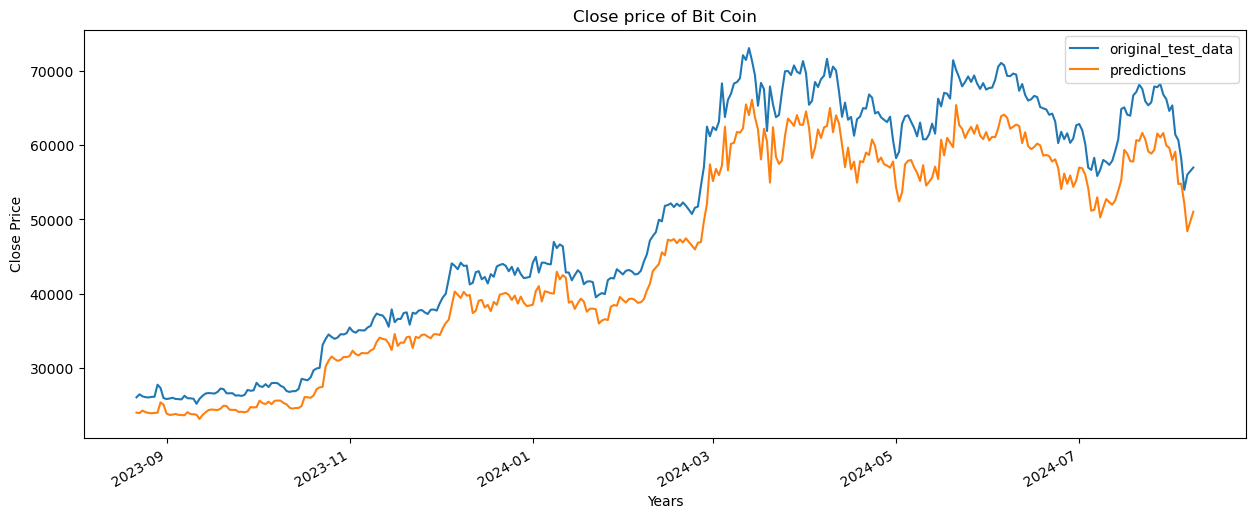

In [27]:
plt.figure()
plotting_data.plot(figsize=(15,6))
plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Close price of Bit Coin')

<h3>Compute Mean absolute error</h3>

In [28]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(inv_y_test, inv_predictions)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  4753.029524369674


In [29]:
last_100 = Closing_price[['Close']].tail(100)
last_100.tail()
last_100 = scaler.fit_transform(last_100['Close'].values.reshape(-1,1)).reshape(1,-1,1)
last_100    

array([[[0.38067813],
        [0.24417819],
        [0.29398256],
        [0.50973892],
        [0.56711715],
        [0.57511751],
        [0.52532678],
        [0.47794492],
        [0.41224679],
        [0.5189116 ],
        [0.38961003],
        [0.38966351],
        [0.42716671],
        [0.51040418],
        [0.4331469 ],
        [0.70322617],
        [0.6438846 ],
        [0.74815912],
        [0.74179652],
        [0.70384914],
        [1.        ],
        [0.92486202],
        [0.86676438],
        [0.79843698],
        [0.83260941],
        [0.87499097],
        [0.83215069],
        [0.88235829],
        [0.81944069],
        [0.77830328],
        [0.82338034],
        [0.77333788],
        [0.78568403],
        [0.78824259],
        [0.84857343],
        [0.94956505],
        [0.97906969],
        [0.96041464],
        [0.87938128],
        [0.8772725 ],
        [0.89687632],
        [0.88910219],
        [0.76420772],
        [0.81628826],
        [0.7312329 ],
        [0

<h3>9. Predict future data</h3>

In [30]:
def predict_future(no_of_days, prev_100):
    
    future_predictions = []
    for i in range(no_of_days):
        next_day = model.predict(prev_100).tolist()
        prev_100_list = prev_100[0].tolist()  # convert numpy array to list
        prev_100_list.append(next_day[0])  # append the prediction
        prev_100 = np.array([prev_100_list[1:]])  # convert list back to numpy array
        future_predictions.append(scaler.inverse_transform(next_day))
        
    return future_predictions

In [40]:
no_of_days = 150
# last_100 = np.array(last_100.tolist())

future_results = predict_future(no_of_days, last_100)
print(future_results)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━

Text(0.5, 1.0, 'Future Close price of Bit coin')

<Figure size 640x480 with 0 Axes>

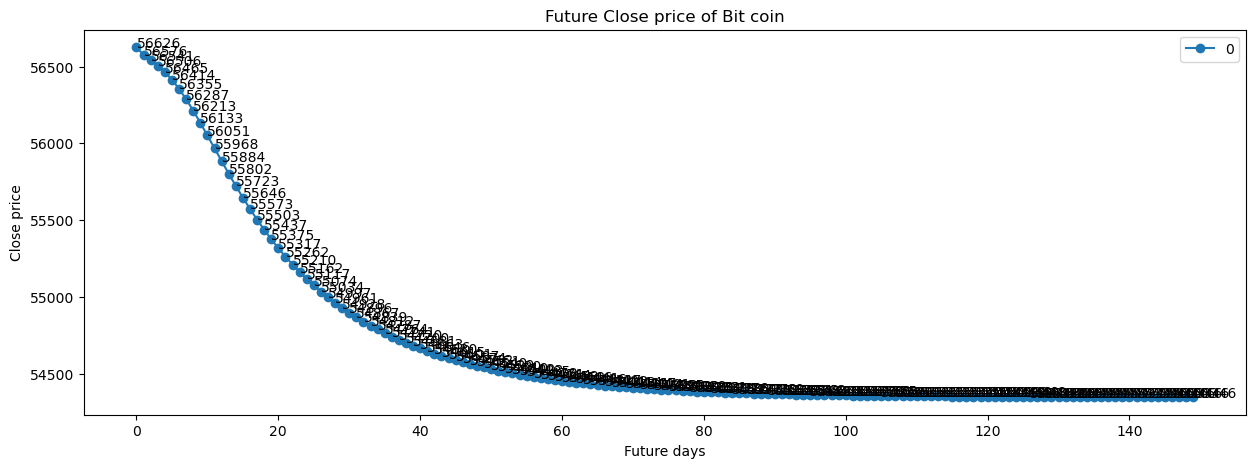

In [41]:
future_results = np.array(future_results).reshape(-1,1)
plt.figure()
pd.DataFrame(future_results).plot(figsize=(15,5), marker='o')
for i in range(len(future_results)):
    plt.text(i,future_results[i],int(future_results[i][0]))
plt.xlabel('Future days')
plt.ylabel('Close price')
plt.title("Future Close price of Bit coin")

In [42]:
model.save("Latest_bit_coin_model.keras")